In [7]:
import random
from typing import List, TypedDict
from langgraph.graph import StateGraph, START, END


In [3]:
class AgentState(TypedDict):
    name: str
    numbers: List[int]
    counter: int

In [6]:
def greeting_node(state: AgentState) -> str:
    """The agent greets the user and initializes the state."""
    state['counter'] = 0
    state["name"] = f"Hi there, {state['name']}!"

    return state

def random_number_node(state: AgentState) -> str:
    """The agent generates a random number and appends it to the list."""
    random_number = random.randint(1, 10)
    state['numbers'].append(random_number)
    state['counter'] += 1

    return state

def should_continue_node(state: AgentState) -> bool:
    """The agent decides whether to continue or stop based on the counter."""
    
    if state['counter'] < 5:
        print ("ENTERING LOOP", state['counter'])
        return "loop"
    else:
        print ("EXITING LOOP", state['counter'])
        return "end"


In [15]:
graph = StateGraph(AgentState)

graph.add_node("greet", greeting_node)
graph.add_node("random_number", random_number_node)
graph.add_edge(START, "greet")
graph.add_edge("greet", "random_number")

graph.add_conditional_edges(
    "random_number", # Source node
    should_continue_node, # Action function
    {
        "loop": "random_number",
        "end": END
    }
)

app = graph.compile()

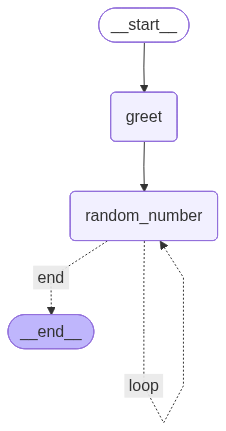

In [13]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
initial_state = {
    "name": "Alice",
    "counter": 0,
    "numbers": []
}

final_state = app.invoke(initial_state)

print("Final State:", final_state)

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4
EXITING LOOP 5
Final State: {'name': 'Hi there, Alice!', 'numbers': [9, 1, 3, 7, 1], 'counter': 5}
